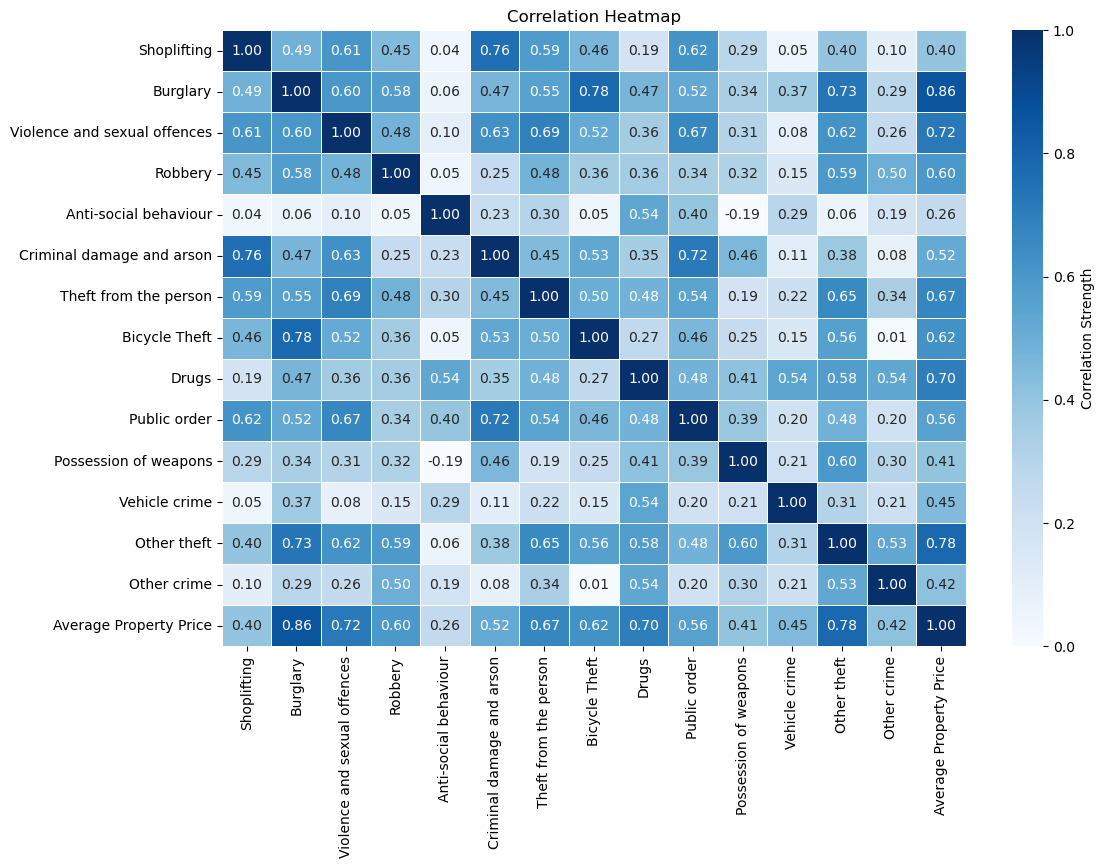

Burglary                        0.858762
Other theft                     0.784301
Violence and sexual offences    0.722030
Drugs                           0.699992
Theft from the person           0.669669
Bicycle Theft                   0.623033
Robbery                         0.597258
Public order                    0.557468
Criminal damage and arson       0.516280
Vehicle crime                   0.446387
Other crime                     0.417422
Possession of weapons           0.405004
Shoplifting                     0.400635
Anti-social behaviour           0.258151
dtype: float64
R² score: 0.5153726174322477
RMSE: 229649.87090936047

Regression equation with all 14 explanatory variables:
 Average Property Price = 506631.16 + (-1172.70 * Shoplifting) + (9412.59 * Burglary) + (628.62 * Violence and sexual offences) + (2500.12 * Robbery) + (-636.97 * Anti-social behaviour) + (2901.30 * Criminal damage and arson) + (295.91 * Theft from the person) + (316.95 * Bicycle Theft) + (2929.59 * 

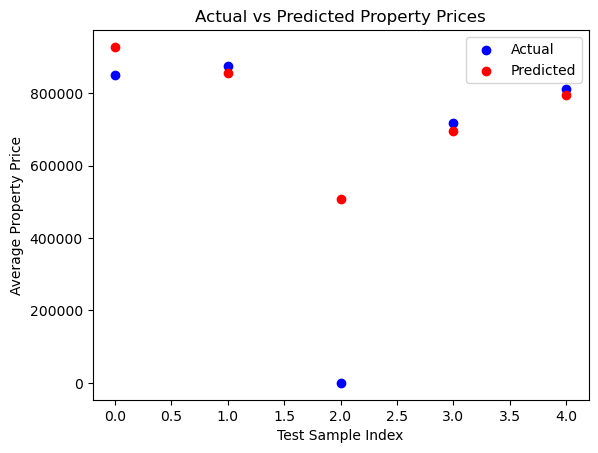

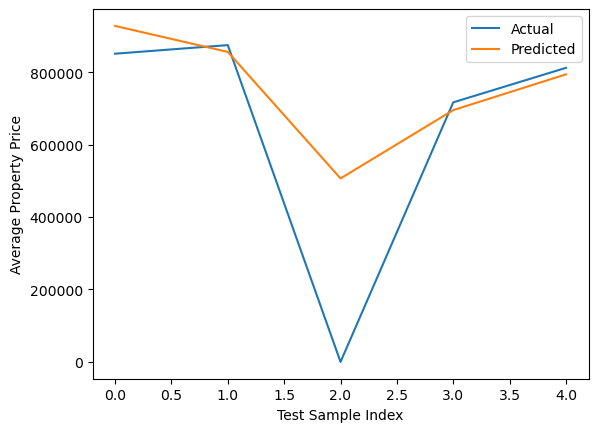

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
df = pd.read_csv("/Users/EthanMcElhone/Downloads/Avg Property Price vs Crime Number by Categories (2023-2024) - Sheet1.csv", header=None)

# Assign column names and strip whitespace
df.columns = [
    "Months",
    "Average Property Price",
    "Shoplifting",
    "Burglary",
    "Violence and sexual offences",
    "Robbery",
    "Anti-social behaviour",
    "Criminal damage and arson",
    "Theft from the person",
    "Bicycle Theft",
    "Drugs",
    "Public order",
    "Possession of weapons",
    "Vehicle crime",
    "Other theft",
    "Other crime"
]
df.columns = df.columns.str.strip()

# List of crime columns
crime_cols = [col.strip() for col in df.columns[2:]]

# Convert crime columns and target to numeric
df[crime_cols] = df[crime_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
df["Average Property Price"] = pd.to_numeric(df["Average Property Price"], errors='coerce').fillna(0)

# Compute correlation matrix
corr_matrix = df[crime_cols + ["Average Property Price"]].corr()

# Heatmap of correlations
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Blues", vmin=0, vmax=1, linewidths=0.5, cbar_kws={'label': 'Correlation Strength'})
plt.title("Correlation Heatmap")
plt.show()

corrs = df[crime_cols].corrwith(df["Average Property Price"])
print(corrs.sort_values(ascending=False))

# Features (X) and target (y)
X = df[crime_cols]
y = df["Average Property Price"]

# Train-test split with shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Fit linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("R² score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Regression equation
intercept = model.intercept_
coefficients = model.coef_

equation = f"Average Property Price = {intercept:.2f}"
for col, coef in zip(crime_cols, coefficients):
    equation += f" + ({coef:.2f} * {col})"
print("\nRegression equation with all 14 explanatory variables:\n", equation)

# Optional: plot predicted vs actual
plt.scatter(range(len(y_test)), y_test, label="Actual", color='blue')
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", color='red')
plt.xlabel("Test Sample Index")
plt.ylabel("Average Property Price")
plt.legend()
plt.title("Actual vs Predicted Property Prices")
plt.show()

# Optional: plot predictions vs actual
plt.plot(range(len(y_test)), y_test, label="Actual")
plt.plot(range(len(y_pred)), y_pred, label="Predicted")
plt.xlabel("Test Sample Index")
plt.ylabel("Average Property Price")
plt.legend()
plt.show()

In-sample R²: 0.9472710138837842
In-sample RMSE: 39879.330575555454

Linear regression equation (all data, in-sample):
 Average Property Price = 18009.26 + (-1473.13 * Shoplifting) + (15252.14 * Burglary) + (1340.33 * Violence and sexual offences) + (5170.11 * Robbery) + (38.13 * Anti-social behaviour) + (5477.43 * Criminal damage and arson) + (863.78 * Theft from the person) + (-4026.62 * Bicycle Theft) + (3354.31 * Drugs) + (-1736.35 * Public order) + (-1948.45 * Possession of weapons) + (1393.75 * Vehicle crime) + (307.21 * Other theft) + (-2309.19 * Other crime)


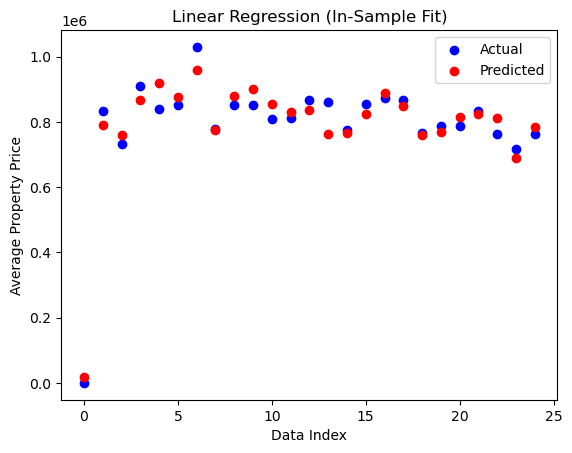

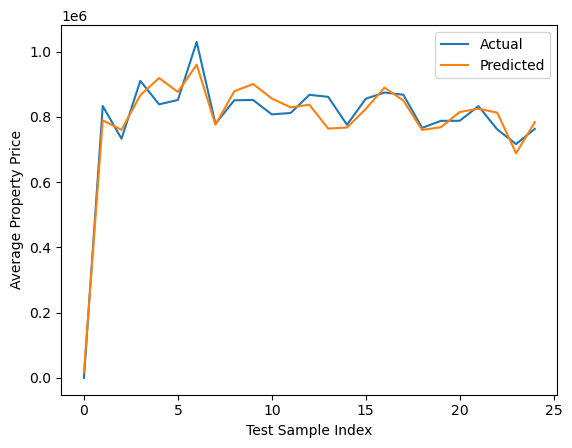

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("/Users/EthanMcElhone/Downloads/Avg Property Price vs Crime Number by Categories (2023-2024) - Sheet1.csv", header=None)

# Assign column names and strip whitespace
df.columns = [
    "Months",
    "Average Property Price",
    "Shoplifting",
    "Burglary",
    "Violence and sexual offences",
    "Robbery",
    "Anti-social behaviour",
    "Criminal damage and arson",
    "Theft from the person",
    "Bicycle Theft",
    "Drugs",
    "Public order",
    "Possession of weapons",
    "Vehicle crime",
    "Other theft",
    "Other crime"
]
df.columns = df.columns.str.strip()

# List of explanatory variables
crime_cols = df.columns[2:]

# Convert crime columns and target to numeric
df[crime_cols] = df[crime_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
df["Average Property Price"] = pd.to_numeric(df["Average Property Price"], errors='coerce').fillna(0)

# Features (X) and target (y)
X = df[crime_cols]
y = df["Average Property Price"]

# Fit linear regression on all data
model = LinearRegression()
model.fit(X, y)

# Predict on the same data (in-sample)
y_pred = model.predict(X)

# In-sample evaluation
r2_in_sample = r2_score(y, y_pred)
rmse_in_sample = np.sqrt(mean_squared_error(y, y_pred))
print("In-sample R²:", r2_in_sample)
print("In-sample RMSE:", rmse_in_sample)

# Regression equation
intercept = model.intercept_
coefficients = model.coef_

equation = f"Average Property Price = {intercept:.2f}"
for col, coef in zip(crime_cols, coefficients):
    equation += f" + ({coef:.2f} * {col})"
print("\nLinear regression equation (all data, in-sample):\n", equation)

# Optional: plot predicted vs actual
plt.scatter(range(len(y)), y, label="Actual", color='blue')
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", color='red')
plt.xlabel("Data Index")
plt.ylabel("Average Property Price")
plt.legend()
plt.title("Linear Regression (In-Sample Fit)")
plt.show()

# Optional: plot predictions vs actual
plt.plot(range(len(y)), y, label="Actual")
plt.plot(range(len(y_pred)), y_pred, label="Predicted")
plt.xlabel("Test Sample Index")
plt.ylabel("Average Property Price")
plt.legend()
plt.show()